In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

from constants import *

random_state = 101
path_import_and_export = "../../../Thesis_data/processed_data/"

In [4]:
ontime_reporting_export = pd.read_csv(path_import_and_export + "ontime_reporting_export.csv", dtype=dtypes)

In [5]:
#Check percent of missing data
round(ontime_reporting_export.isnull().sum() * 100 / len(ontime_reporting_export), 2)

MONTH                  0.00
DAY_OF_MONTH           0.00
DAY_OF_WEEK            0.00
OP_UNIQUE_CARRIER      0.00
TAIL_NUM               0.25
ORIGIN_AIRPORT_ID      0.00
ORIGIN                 0.00
ORIGIN_CITY_NAME       0.00
DEST                   0.00
CRS_DEP_TIME           0.00
DEP_DEL15              1.69
DISTANCE_GROUP         0.00
MANUFACTURE_YEAR       3.75
NUMBER_OF_SEATS        3.75
AWND                   0.01
PRCP                   0.03
SNOW                  29.50
SNWD                  31.85
TMAX                   0.01
MEDIAN_AGE             0.00
TOT_POP                0.00
AVG_HOUSEHOLD_SIZE     0.00
dtype: float64

In [6]:
#A matrix to help visualize the missing data and how it correlates per row
msno.matrix(ontime_reporting_export, figsize=(10, 6))

# 1. Cleaning missing data
## 1.1 Cleaning missing: Dependant variable (DEP_DEL15)

In [7]:
#Deleting empty DEP_DEL15 records as this is the target value and imputing doesnt make sense here as it would only introduce noise
ontime_reporting_export = ontime_reporting_export.dropna(subset=['DEP_DEL15'])
round(ontime_reporting_export.isnull().sum() * 100 / len(ontime_reporting_export), 2)

MONTH                  0.00
DAY_OF_MONTH           0.00
DAY_OF_WEEK            0.00
OP_UNIQUE_CARRIER      0.00
TAIL_NUM               0.00
ORIGIN_AIRPORT_ID      0.00
ORIGIN                 0.00
ORIGIN_CITY_NAME       0.00
DEST                   0.00
CRS_DEP_TIME           0.00
DEP_DEL15              0.00
DISTANCE_GROUP         0.00
MANUFACTURE_YEAR       3.47
NUMBER_OF_SEATS        3.47
AWND                   0.01
PRCP                   0.03
SNOW                  29.54
SNWD                  31.88
TMAX                   0.01
MEDIAN_AGE             0.00
TOT_POP                0.00
AVG_HOUSEHOLD_SIZE     0.00
dtype: float64

## 1.2 Cleaning missing: Weather data

In [8]:
#Replace NA's in columns (SNOW) and (SNWD) with 0 as they can be missing, it just means it did not snow that day
#Only replace NA's with 0 if both are NA
#ontime_reporting_export.loc[(ontime_reporting_export['SNOW'].isna()) & (ontime_reporting_export['SNWD'].isna())] = 0.0
temp = (ontime_reporting_export['SNOW'].isna()) & (ontime_reporting_export['SNWD'].isna())
ontime_reporting_export['SNOW'].loc[temp] = 0.0
ontime_reporting_export['SNWD'].loc[temp] = 0.0

round(ontime_reporting_export.isnull().sum() * 100 / len(ontime_reporting_export), 2)

MONTH                 0.00
DAY_OF_MONTH          0.00
DAY_OF_WEEK           0.00
OP_UNIQUE_CARRIER     0.00
TAIL_NUM              0.00
ORIGIN_AIRPORT_ID     0.00
ORIGIN                0.00
ORIGIN_CITY_NAME      0.00
DEST                  0.00
CRS_DEP_TIME          0.00
DEP_DEL15             0.00
DISTANCE_GROUP        0.00
MANUFACTURE_YEAR      3.47
NUMBER_OF_SEATS       3.47
AWND                  0.01
PRCP                  0.03
SNOW                  0.17
SNWD                  2.51
TMAX                  0.01
MEDIAN_AGE            0.00
TOT_POP               0.00
AVG_HOUSEHOLD_SIZE    0.00
dtype: float64

In [9]:
#Using a multivariate imputer to fill the other missing weather data using all the relevant columns from that dataset
#In theory this would be the most accurate imputation method as it depends on the other weather feature which would have an influence on the imputed value
#This would be more accurate instead of taking the mean/median/mode
MI_columns = ontime_reporting_export.loc[:, ["AWND", "PRCP", "SNOW", "SNWD", "TMAX"]]

Multivariate_imputer = IterativeImputer(random_state=random_state, max_iter=10)
df_imputed = Multivariate_imputer.fit_transform(MI_columns)

#Replace NA's with imputed values
ontime_reporting_export.loc[:, ["AWND", "PRCP", "SNOW", "SNWD", "TMAX"]] = df_imputed
round(ontime_reporting_export.isnull().sum() * 100 / len(ontime_reporting_export), 2)

MONTH                 0.00
DAY_OF_MONTH          0.00
DAY_OF_WEEK           0.00
OP_UNIQUE_CARRIER     0.00
TAIL_NUM              0.00
ORIGIN_AIRPORT_ID     0.00
ORIGIN                0.00
ORIGIN_CITY_NAME      0.00
DEST                  0.00
CRS_DEP_TIME          0.00
DEP_DEL15             0.00
DISTANCE_GROUP        0.00
MANUFACTURE_YEAR      3.47
NUMBER_OF_SEATS       3.47
AWND                  0.00
PRCP                  0.00
SNOW                  0.00
SNWD                  0.00
TMAX                  0.00
MEDIAN_AGE            0.00
TOT_POP               0.00
AVG_HOUSEHOLD_SIZE    0.00
dtype: float64

## 1.3 Cleaning missing: Aircraft inventory data

In [13]:
#Converting MANUFACTURE_YEAR and NUMBER_OF_SEATS to intergers while retaining the NA values for imputation
#ontime_reporting_export['MANUFACTURE_YEAR'] = ontime_reporting_export['MANUFACTURE_YEAR'].astype('Int64')
#ontime_reporting_export['NUMBER_OF_SEATS'] = ontime_reporting_export['NUMBER_OF_SEATS'].astype('Int64')

ontime_reporting_export['MANUFACTURE_YEAR'].fillna((ontime_reporting_export['MANUFACTURE_YEAR'].median()), inplace=True)
ontime_reporting_export['NUMBER_OF_SEATS'].fillna((ontime_reporting_export['NUMBER_OF_SEATS'].median()), inplace=True)

# #Imputing MANUFACTURE_YEAR and NUMBER_OF_SEATS using Multiple 
# MI_columns = ontime_reporting_export.loc[:, ["MANUFACTURE_YEAR","NUMBER_OF_SEATS"]]

# Multivariate_imputer = IterativeImputer(random_state=random_state, max_iter=10)
# df_imputed = Multivariate_imputer.fit_transform(MI_columns)

# #Replace NA's with imputed values
# ontime_reporting_export.loc[:, ["MANUFACTURE_YEAR","NUMBER_OF_SEATS"]] = df_imputed
round(ontime_reporting_export.isnull().sum() * 100 / len(ontime_reporting_export), 2)

MONTH                 0.0
DAY_OF_MONTH          0.0
DAY_OF_WEEK           0.0
OP_UNIQUE_CARRIER     0.0
TAIL_NUM              0.0
ORIGIN_AIRPORT_ID     0.0
ORIGIN                0.0
ORIGIN_CITY_NAME      0.0
DEST                  0.0
CRS_DEP_TIME          0.0
DEP_DEL15             0.0
DISTANCE_GROUP        0.0
MANUFACTURE_YEAR      0.0
NUMBER_OF_SEATS       0.0
AWND                  0.0
PRCP                  0.0
SNOW                  0.0
SNWD                  0.0
TMAX                  0.0
MEDIAN_AGE            0.0
TOT_POP               0.0
AVG_HOUSEHOLD_SIZE    0.0
dtype: float64

# 2. Exploratory Data Analysis (EDA)

<AxesSubplot: >

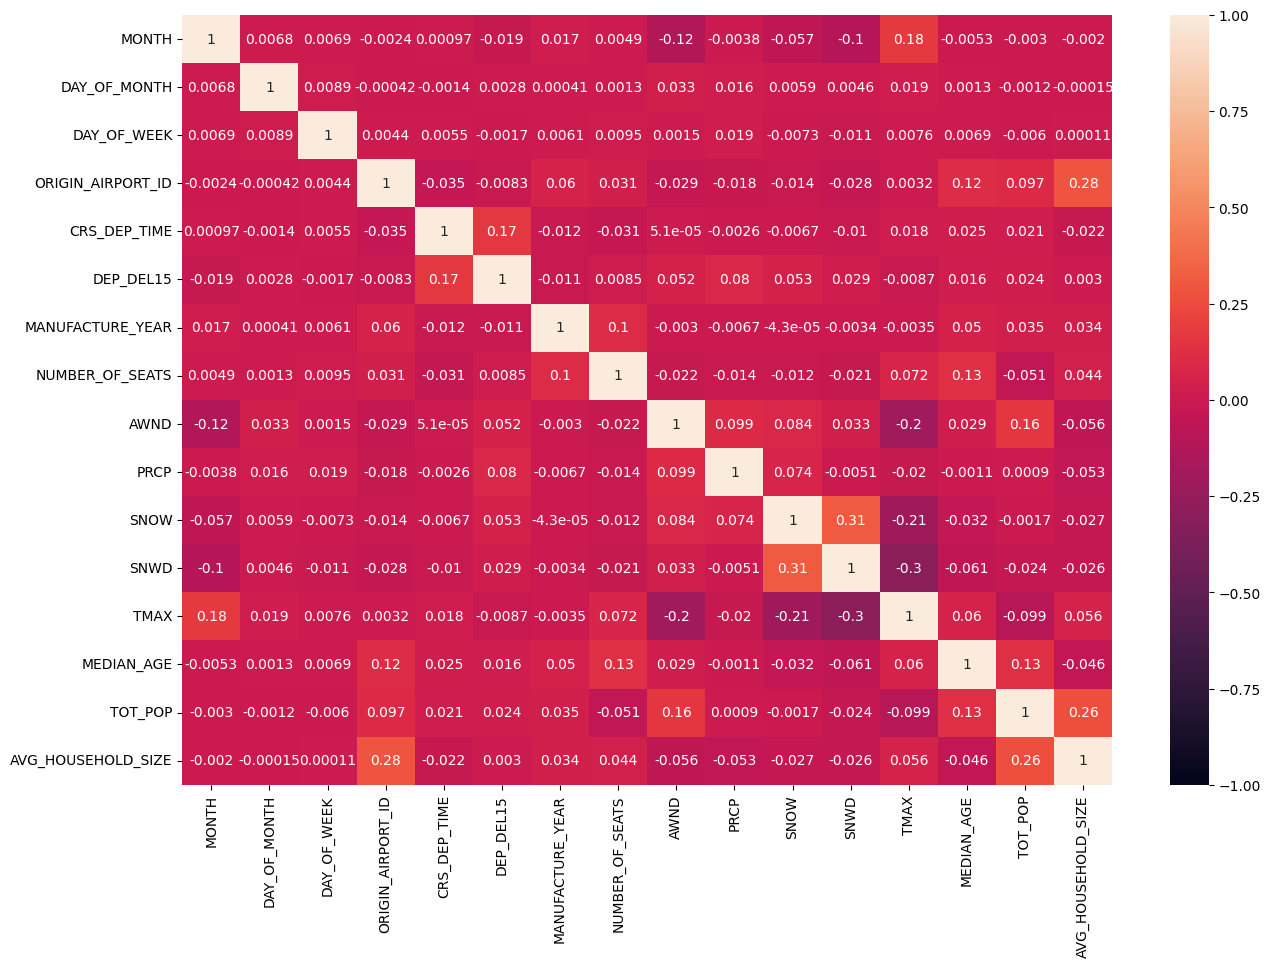

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(ontime_reporting_export.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

In [67]:
from scipy import stats

#stats.pointbiserialr(ontime_reporting_export['DEP_DEL15'], ontime_reporting_export['DISTANCE_GROUP'])

categorical_columns = ['DISTANCE_GROUP', 'OP_UNIQUE_CARRIER']

# List of continuous variables
continuous_columns = ['DEP_DEL15', 'MONTH']

# Iterate through pairs of categorical and continuous variables
for cat_col in categorical_columns:
    for cont_col in continuous_columns:
        # Group the data by the categorical variable and perform ANOVA
        grouped_data = [ontime_reporting_export[cont_col][ontime_reporting_export[cat_col] == category] for category in ontime_reporting_export[cat_col].unique()]
        f_statistic, p_value = stats.f_oneway(*grouped_data)
        
        print(f"ANOVA between '{cat_col}' and '{cont_col}':")
        print(f"F-statistic: {f_statistic:.2f}")
        print(f"P-value: {p_value}")
        print()

ANOVA between 'DISTANCE_GROUP' and 'DEP_DEL15':
F-statistic: 199.82
P-value: 0.0

ANOVA between 'DISTANCE_GROUP' and 'MONTH':
F-statistic: 71.20
P-value: 1.7108119866050739e-146

ANOVA between 'OP_UNIQUE_CARRIER' and 'DEP_DEL15':
F-statistic: 1857.89
P-value: 0.0

ANOVA between 'OP_UNIQUE_CARRIER' and 'MONTH':
F-statistic: 184.27
P-value: 0.0



In [ ]:
plt.ticklabel_format(style='plain')
ontime_reporting_export["DEP_DEL15"] = ontime_reporting_export["DEP_DEL15"].astype("category")
ontime_reporting_export["DEP_DEL15"].value_counts().plot(kind='bar')
plt.show()

In [10]:
def describe(df):
    return pd.concat([df.describe().T,
                      df.skew(numeric_only=True).rename('skew'),
                      df.kurt(numeric_only=True).rename('kurt'),
                      df.median(numeric_only=True).rename('median'),
                     ], axis=1).T

ontime_explained = describe(ontime_reporting_export)
ontime_explained

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,CRS_DEP_TIME,DEP_DEL15,MANUFACTURE_YEAR,NUMBER_OF_SEATS,AWND,PRCP,SNOW,SNWD,TMAX,MEDIAN_AGE,TOT_POP,AVG_HOUSEHOLD_SIZE
count,5900559.0,5900559.0,5900559.0,5900559.0,5900559.0,5900559.0,5695681.0,5695681.0,5900559.0,5900559.0,5900559.0,5900559.0,5900559.0,5900559.0,5900559.0,5900559.0
mean,6.589711,15.71798,3.93421,12661.540142,1342.402271,0.189135,2007.448802,133.651073,8.302092,0.104868,0.035415,0.111083,70.92165,34.478425,1350893.066091,2.517444
std,3.405903,8.758198,1.994603,1515.76343,495.492162,0.391616,7.070544,47.066066,3.59918,0.347625,0.33812,0.80329,18.551742,2.062648,1878132.699385,0.286742
min,1.0,1.0,1.0,10140.0,1.0,0.0,1987.0,44.0,0.0,0.0,-0.063141,-0.273557,-10.0,29.9,71109.0,2.08
25%,4.0,8.0,2.0,11278.0,920.0,0.0,2002.0,76.0,5.82,0.0,0.0,0.0,58.0,33.7,410935.0,2.36
50%,7.0,16.0,4.0,12892.0,1330.0,0.0,2007.0,143.0,7.61,0.0,0.0,0.0,74.0,34.2,672228.0,2.51
75%,10.0,23.0,6.0,13930.0,1746.0,0.0,2014.0,173.0,10.29,0.03,0.0,0.0,86.0,35.3,1469824.0,2.66
max,12.0,31.0,7.0,15919.0,2359.0,1.0,2019.0,337.0,33.78,11.63,17.2,25.2,115.0,42.8,8550405.0,4.58
skew,-0.027117,0.007478,0.050595,0.02999,0.066646,1.587601,-0.106532,-0.187608,0.977119,9.611784,15.722367,11.496468,-0.545829,1.325611,2.847204,2.708084
kurt,-1.178865,-1.185988,-1.221813,-1.29691,-1.062427,0.520478,-0.940185,-0.47657,1.506397,191.455349,339.812786,175.667973,-0.2161,3.633149,7.902366,16.79204


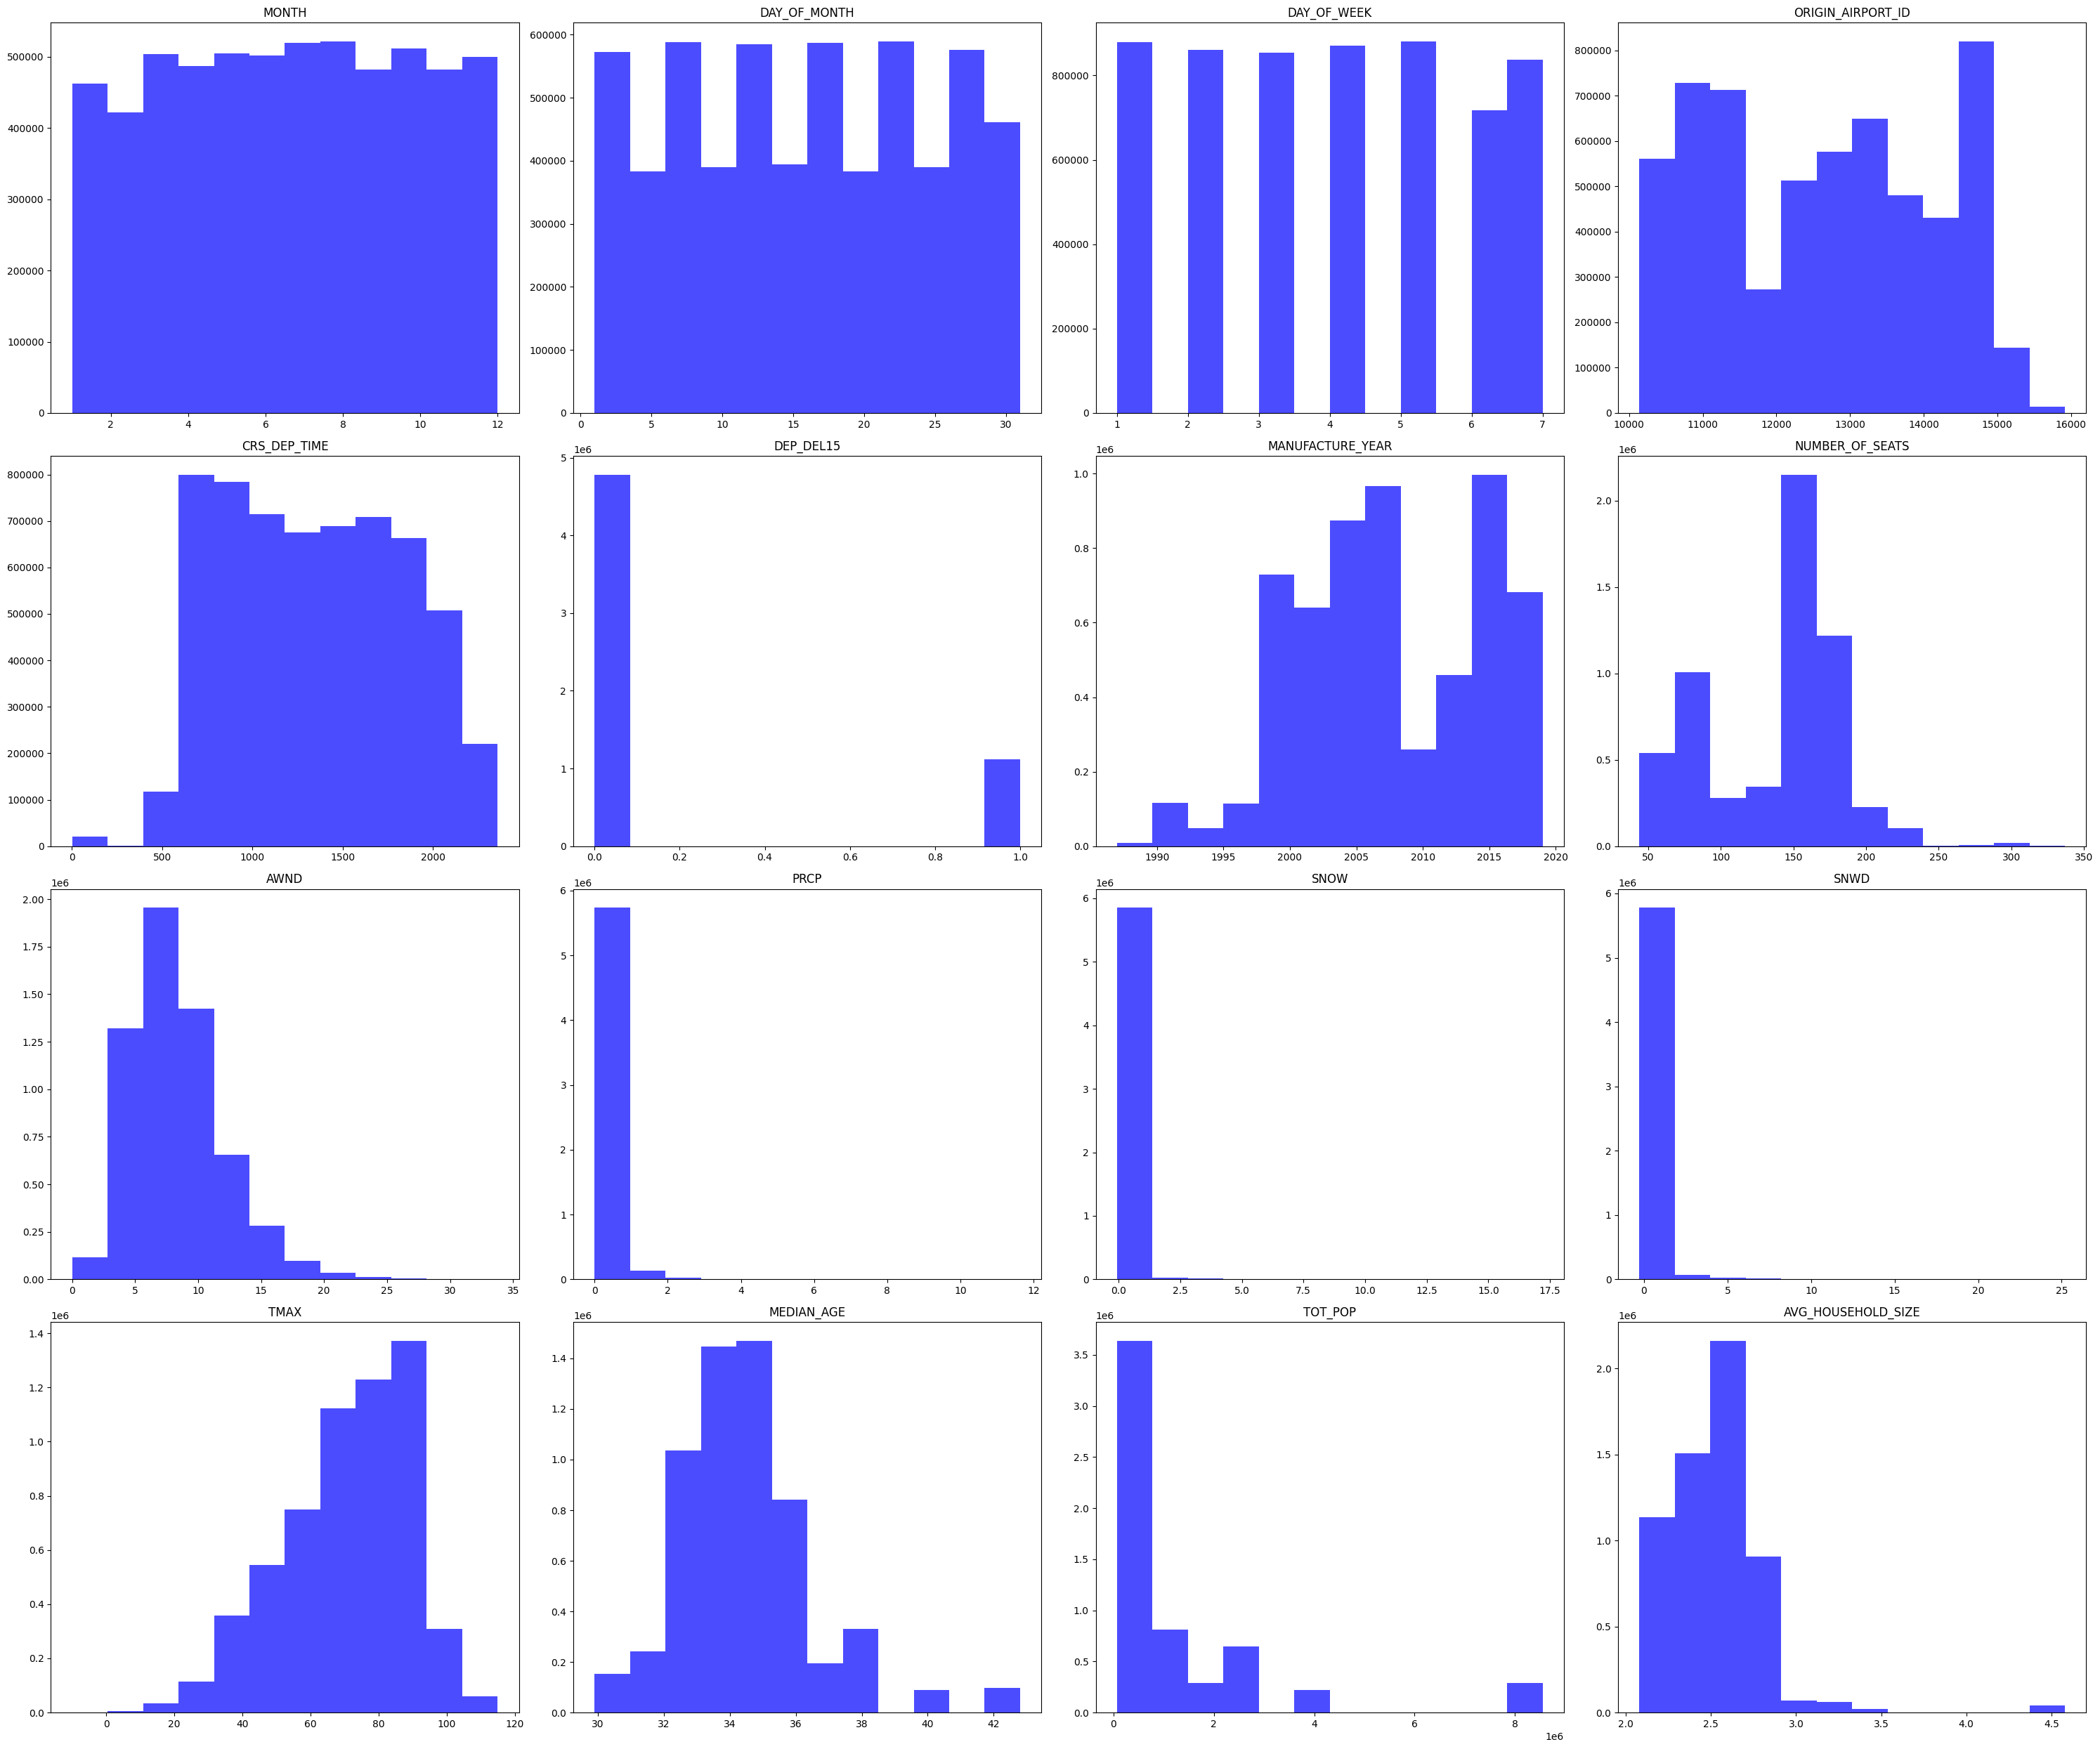

In [18]:
#Looking for high skewness
# skew_df = pd.DataFrame(ontime_explained.loc["skew", (ontime_explained.loc["skew",:] < -0.5) | (ontime_explained.loc["skew",:] > 0.5)])
# ontime_explained.T.columns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 4, figsize=(30, 25))  # 2 rows, 5 columns
axs = axs.flatten()

for i, col in enumerate(ontime_reporting_export.select_dtypes(include='number')):
    axs[i].hist(ontime_reporting_export[col], bins=12, color='blue', alpha=0.7)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

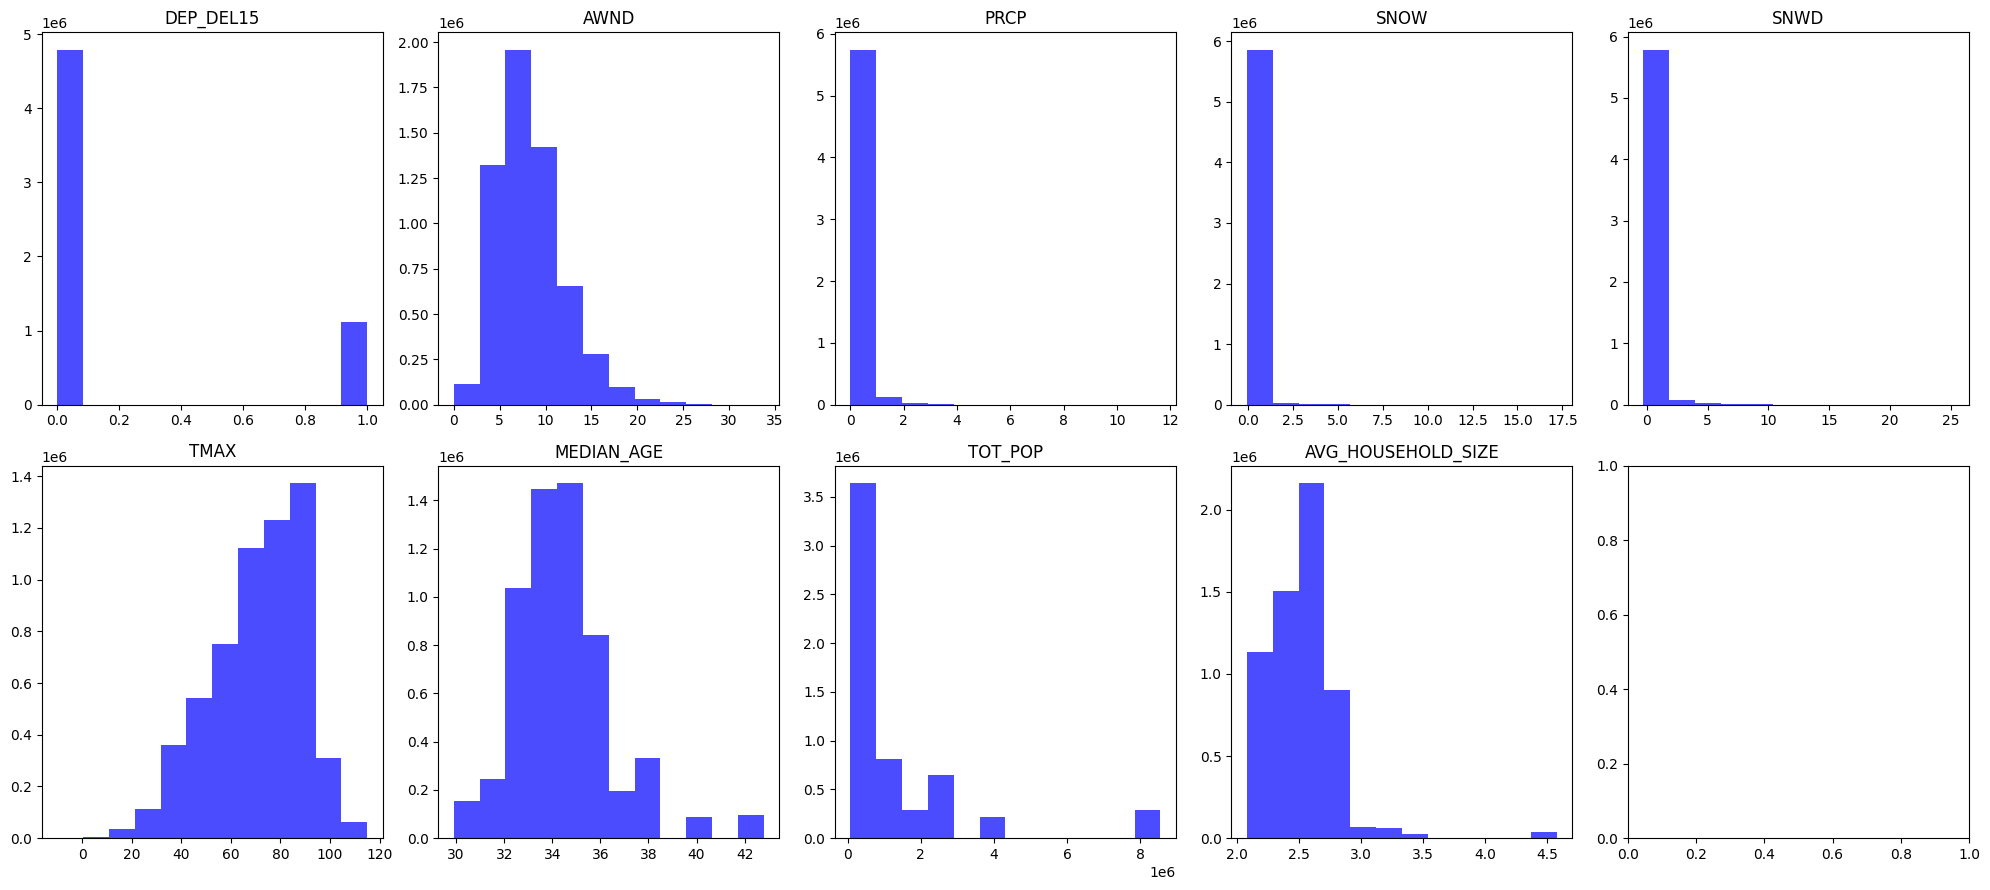

In [10]:
#Looking for high skewness
skew_df = pd.DataFrame(ontime_explained.loc["skew", (ontime_explained.loc["skew",:] < -0.5) | (ontime_explained.loc["skew",:] > 0.5)])
skew_df.T.columns

fig, axs = plt.subplots(2, 5, figsize=(20, 9))  # 2 rows, 5 columns
axs = axs.flatten()

for i, col in enumerate(ontime_reporting_export[skew_df.T.columns]):
    axs[i].hist(ontime_reporting_export[col], bins=12, color='blue', alpha=0.7)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
#Looking for high kurtosis
kurtosis_cols = ontime_explained.loc["kurt", (ontime_explained.loc["kurt",:] < -3) | (ontime_explained.loc["kurt",:] > 3)]

for col in kurtosis_cols.index:
    plt.subplot(20, 5, len(kurtosis_cols.index))
    plt.hist(ontime_reporting_export[col])
    plt.title(col)

In [ ]:
#Boxplots for outlier visualization

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,200))
cols = ontime_reporting_export.loc[:, ~ontime_reporting_export.columns.isin(["OP_UNIQUE_CARRIER", "TAIL_NUM", "ORIGIN", "DEST"])]
try:
    for i, col in enumerate(cols):
        plt.subplot(25, 5, i+1)
        plt.hist(ontime_reporting_export[col], label=col, color="blue")
        plt.legend()
        plt.title(col)
        plt.tight_layout()
except Exception as e:
    print(col,e)

# 3. Feature Engineering

In [20]:
#Feature Enginering of "Previous_flight_delayed"
ontime_reporting_export = ontime_reporting_export.sort_values(['MONTH', 'DAY_OF_MONTH', 'TAIL_NUM', 'CRS_DEP_TIME'])
ontime_reporting_export["PREV_FLIGHT_DELAY"] = 0
ontime_reporting_export.loc[(ontime_reporting_export["TAIL_NUM"] == ontime_reporting_export["TAIL_NUM"].shift(1)) & (ontime_reporting_export["DEP_DEL15"].shift(1) == True), "PREV_FLIGHT_DELAY"] = 1

In [22]:
pd.set_option('display.max_columns', None)
ontime_reporting_export.head(25)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST,CRS_DEP_TIME,DEP_DEL15,DISTANCE_GROUP,MANUFACTURE_YEAR,NUMBER_OF_SEATS,AWND,PRCP,SNOW,SNWD,TMAX,MEDIAN_AGE,TOT_POP,AVG_HOUSEHOLD_SIZE,PREV_FLIGHT_DELAY
870709,1,1,2,G4,216NV,11986,GRR,Grand Rapids,PIE,1805,0,5,2007,143,7.61,0.00,0.0,0.0,35.0,32.1,195099,2.56,0
3203886,1,1,2,G4,218NV,15919,XNA,Fayetteville,SFB,1033,1,4,2007,143,8.28,0.00,0.0,0.0,40.0,30.7,201965,2.50,0
3687579,1,1,2,G4,219NV,11423,DSM,Des Moines,SFB,1711,0,5,2007,143,10.29,0.00,0.0,0.0,20.0,34.5,210317,2.41,0
870731,1,1,2,G4,220NV,11986,GRR,Grand Rapids,SFB,1911,0,5,2007,143,7.61,0.00,0.0,0.0,35.0,32.1,195099,2.56,0
2108091,1,1,2,G4,222NV,15412,TYS,Knoxville,PGD,1215,0,3,2007,143,5.14,0.03,0.0,0.0,60.0,33.1,185312,2.21,0
1627158,1,1,2,G4,223NV,12339,IND,Indianapolis,SFB,830,0,4,2007,143,6.71,0.00,0.0,0.0,42.0,34.1,848423,2.53,0
1627097,1,1,2,G4,223NV,12339,IND,Indianapolis,JAX,1434,1,3,2007,143,6.71,0.00,0.0,0.0,42.0,34.1,848423,2.53,0
890087,1,1,2,G4,223NV,12451,JAX,Jacksonville,IND,1715,1,3,2007,143,4.70,0.00,0.0,0.0,83.0,35.7,868031,2.62,1
1627160,1,1,2,G4,224NV,12339,IND,Indianapolis,PGD,1404,0,4,2007,143,6.71,0.00,0.0,0.0,42.0,34.1,848423,2.53,0
396230,1,1,2,G4,225NV,11193,CVG,Cincinnati,LAS,1200,1,7,2007,143,5.82,0.00,0.0,0.0,53.0,32.7,298537,2.08,0


In [25]:
#Airplane age: build year - 2019
ontime_reporting_export['PLANE_AGE'] = 2019 - ontime_reporting_export['MANUFACTURE_YEAR']
ontime_reporting_export = ontime_reporting_export.drop(columns=["MANUFACTURE_YEAR"])

<AxesSubplot: >

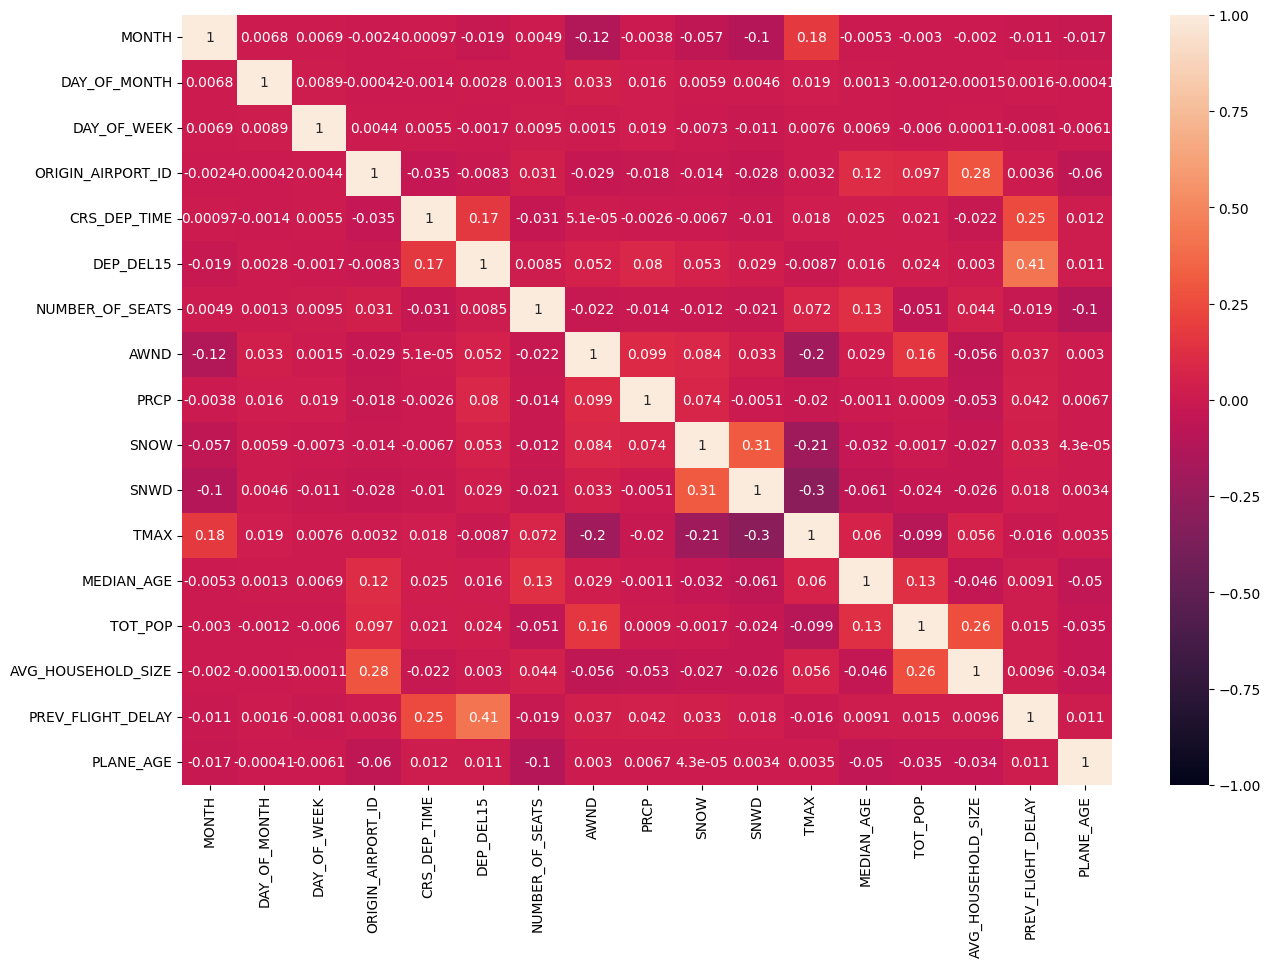

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(ontime_reporting_export.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

In [27]:
#Exporting the cleaned dataset
ontime_reporting_export.to_csv(path_import_and_export + "ontime_reporting_clean_export.csv", index=False)